In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
img = load_npz(7856)

In [73]:
np.array(img).shape

(256, 256, 3)

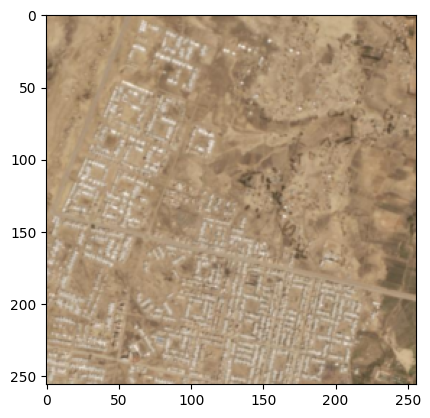

In [63]:
plt.imshow(img)

In [15]:
indexes = np.arange(0,20888)

In [17]:
img_indexes = np.delete(indexes, np.load('../error_indexes.npy'))

In [21]:
img_indexes

2094

In [29]:
np.load('../error_indexes.npy')

array([ 2093,  2473,  2516,  2542,  3694,  9577,  9973, 10498, 11538,
       19389])

In [4]:
def load_npz(i):
    path = f'image_{i}.npz'
    X = np.load(path)
    image = np.array([X[row] for row in X.files])
    return image

In [5]:
import numpy as np
import os
import tensorflow as tf
from scipy.ndimage import rotate
import cv2
def convert_npz_to_bgr(i):
    # Load the .npz file
    image = load_npz(i)
    # Iterate over all keys in the file
    if image.shape[0] != 224 or image.shape[1] != 224:
            image = tf.image.resize(image, (224, 224))
    if image.shape[2] == 3:  # Check if the image has 3 color channels
            image = tf.reverse(image, axis=[-1])
    if image.shape != (224, 224, 3):
            raise ValueError(f"Image shape is {image.shape}, expected (224, 224, 3)")
    image = tf.cast(image, tf.float32)
    # Preprocess the image using VGG16's preprocessing function
    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image
    # for key in data.keys():
    #     # Extract the image data
    #     image = data[key]
    #     image = np.expand_dims(image, axis=0)
    #     # Check if the image needs to be resized
    #     if image.shape[0] != 224 or image.shape[1] != 224:
    #         image = tf.image.resize(image, (224, 224))
    #     # Convert the image from RGB to BGR (if necessary)
    #     # VGG16 expects the image in BGR format.
    #     if image.shape[2] == 3:  # Check if the image has 3 color channels
    #         image = tf.reverse(image, axis=[-1])  # Reversing channels from RGB to BGR
    #     # Ensure the image is in the shape (224, 224, 3)
    #     if image.shape != (224, 224, 3):
    #         raise ValueError(f"Image shape is {image.shape}, expected (224, 224, 3)")
    #     # Convert the image to float32, as VGG16 expects inputs in float32
    #     image = tf.cast(image, tf.float32)
    #     # Preprocess the image using VGG16's preprocessing function
    #     image = tf.keras.applications.vgg16.preprocess_input(image)
    #     # Store the preprocessed image
    #     bgr_images[key] = image
    # return bgr_images


2024-06-10 10:20:38.541323: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 10:20:39.432683: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2024-06-10 10:20:39.432789: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

In [53]:
img_list = []
index_list = []
path='/home/jupyter/Predicting-Economic-Activity-Satelite-Imagery/image_download'
for filename in os.listdir(path):
    if filename.endswith('.npz'):
        file_path = os.path.join(path, filename)
        index = int(filename.split('_')[-1].split('.')[0])
        # if index < 2000:
        img_list.append(convert_npz_to_bgr(index))
        index_list.append(index)

In [62]:
len(index_list[3299:3299+3299])

3299

In [33]:
len(img_list)

1982

In [41]:
from script_images_Copy1_Copy1 import process_ethiopia, process_nigeria, open_tif_image, add_nightlights, generate_download_locations, drop_0s, drop_in_range, create_nightlights_bin

data_eth = process_ethiopia()

data_nig = process_nigeria()

transform, tif_array = open_tif_image()

add_nightlights(data_eth, tif_array, transform)

add_nightlights(data_nig, tif_array, transform)

df_eth_download = generate_download_locations(data_eth)

df_nig_download =  generate_download_locations(data_nig)

df_nig_download["country"] = "nig"
df_eth_download["country"] = "eth"
df_potential_download = pd.concat([ df_eth_download, df_nig_download], axis=0)
df_potential_download.reset_index(drop=True, inplace=True)

df_mod_download = drop_0s(df_potential_download, fr=0.1)

df_mod_download = drop_in_range(df_mod_download, lower=0.001, upper=3, fr=0.4)

df_mod_download = drop_0s(df_mod_download, fr=0.2)

label0_max = 0.05
label1_max = 5
label2_max = 70

df_download = df_mod_download.copy()

create_nightlights_bin(df_download, cutoffs=[label0_max, label1_max, label2_max])

FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/geo_eth.csv'

In [45]:
test =pd.DataFrame([["hi", "hello"],
              [1, 2]])

In [43]:
import pandas as pd

In [46]:
test

,0,1
0,hi,hello
1,1,2


In [50]:
test.iloc[[0,1]]

,0,1
0,hi,hello
1,1,2


In [64]:
np.arange(0,9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])